y (9768, 1)
y pred (9768, 1)
Accuracy of Test data is 83 and of traing data is 82 
for values from 0
c_f (3000, 1)
theta (45000, 1)


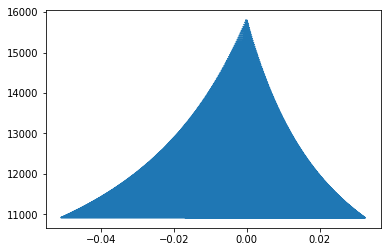

for values from 1
c_f (3000, 1)
theta (45000, 1)


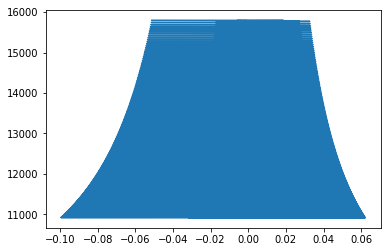

for values from 2
c_f (3000, 1)
theta (45000, 1)


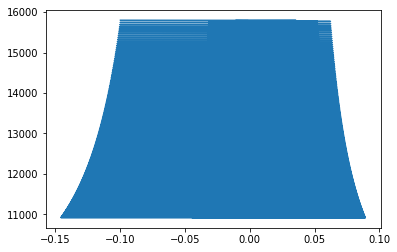

for values from 3
c_f (3000, 1)
theta (45000, 1)


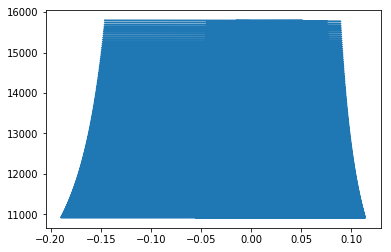

for values from 4
c_f (3000, 1)
theta (45000, 1)


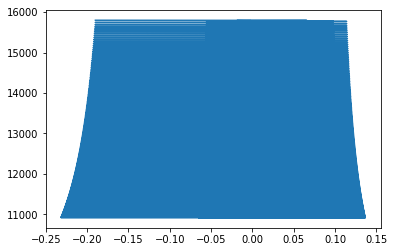

for values from 5
c_f (3000, 1)
theta (45000, 1)


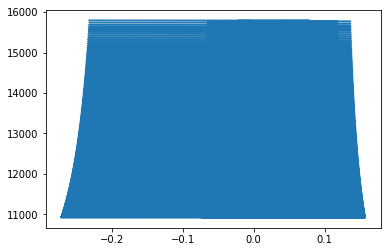

for values from 6
c_f (3000, 1)
theta (45000, 1)


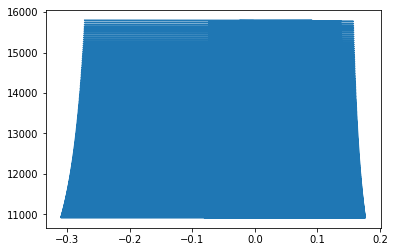

for values from 7
c_f (3000, 1)
theta (45000, 1)


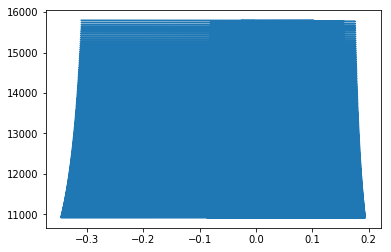

for values from 8
c_f (3000, 1)
theta (45000, 1)


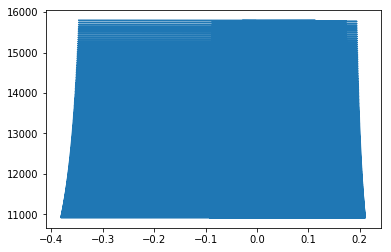

for values from 9
c_f (3000, 1)
theta (45000, 1)


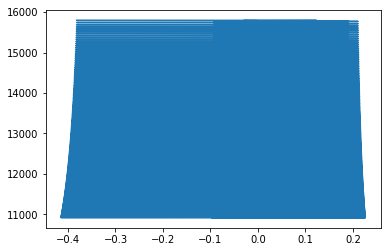

for values from 10
c_f (3000, 1)
theta (45000, 1)


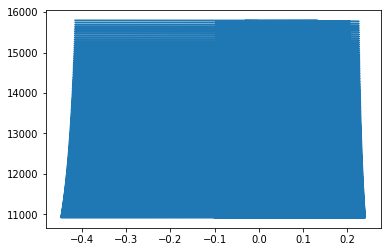

for values from 11
c_f (3000, 1)
theta (45000, 1)


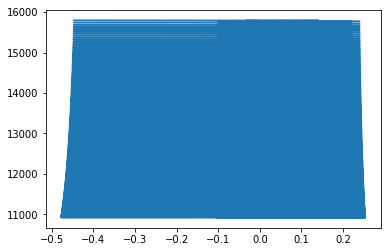

for values from 12
c_f (3000, 1)
theta (45000, 1)


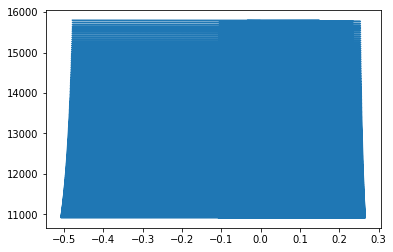

for values from 13
c_f (3000, 1)
theta (45000, 1)


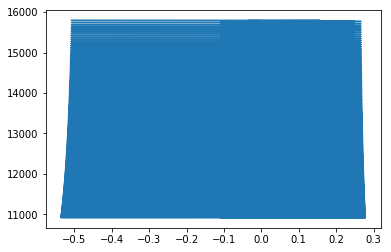

for values from 14
c_f (3000, 1)
theta (45000, 1)


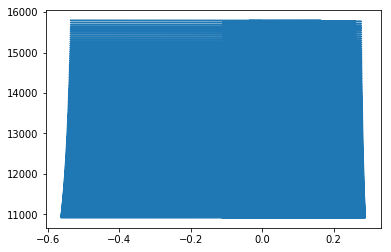

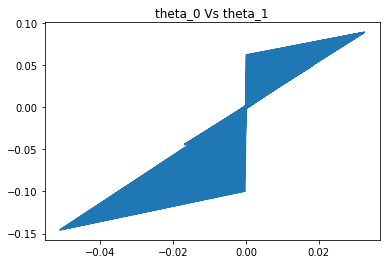

iterations_vs_cost_fun (3000, 1)


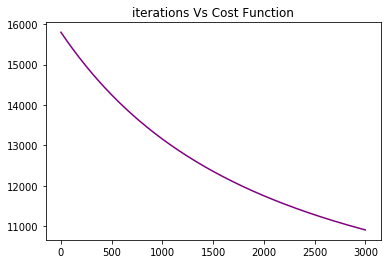

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score


class LogisticRegression:
    
    def __init__(self):
         # Learning Rate
        self.l_rate = 0.001
         # Total iterations
        self.echops = 3000
        
    # Training the model using algorithm
    def gradient_descent(self,x_train_data, y_train_data, parameters):
        theta_values = np.array([])
        cost_fun = np.array([])
          # Add 1 to first position in x_train_data
        x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
        theta_values = np.array([])
        
        for i in range(self.echops):          
            
            z = np.dot(x_train_data, parameters)
            sigmoid = (1 / (1+np.exp(-z)))

            temp1 = sigmoid - y_train_data
            
            temp2 = np.dot( x_train_data.T, temp1)
            temp2 = np.dot(temp2, self.l_rate) / len(x_train_data)
            parameters = parameters - temp2
            theta_values = np.append(theta_values, parameters)

            cost_function = (np.dot(-y_train_data.T , np.log(sigmoid)) - np.dot((1 - y_train_data).T , np.log(np.abs(1 - sigmoid))))
            cost_fun = np.append(cost_fun, cost_function)
 
        return parameters, theta_values, cost_fun
    
    # testing the model on test data set
    def prediction(self,parameters,x_test_data):
            x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
            prediction = np.zeros((x_test_data.shape[0], 1), dtype=float)

            z = np.dot(x_test_data, parameters)
            sigmoid = 1 / (1+np.exp(-z))
            
            for i in range(len(sigmoid)):
                if sigmoid[i][0] >= 0.5 :
                    prediction[i][0] = 1                    
                else : 
                    prediction[i][0] = 0
            prediction = np.reshape(prediction,(len(prediction), 1))
    
            return prediction
                    
    # Find accuracy 
    def accuracy(self, y_data_test, y_pred_test):
        
            total_error = 0
            for i in range(len(y_data_test)):
                total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
            total_error = (total_error / len(y_data_test))
            accuracy = 1 - total_error
            return accuracy * 100
    

        
    def theta_0_vs_iterations(self, cost_fun, theta, size):
            for j in range(0,size):
                print("for values from", j)
                x = [theta[i+(self.echops)*j] for i in range(len(cost_fun))]
                print("c_f",cost_fun.shape)
                print("theta",theta.shape)

                y = [cost_fun[i] for i in range(len(cost_fun))]
                plt.plot(x,y)
                plt.show()

            plt.title("theta_0 Vs theta_1")
            x = [theta[i] for i in range(len(cost_fun))]
            y = [theta[i+6000] for i in range(len(cost_fun))]
            plt.plot(x,y)
            plt.show()

    def iterations_vs_cost_fun(self,cost_fun):
        print("iterations_vs_cost_fun",cost_fun.shape)
        plt.title("iterations Vs Cost Function")
        x = range(self.echops)
        y = [cost_fun[i] for i in range(len(cost_fun))]
        plt.plot(x,y, c = "purple")
        plt.show()

            
    def test_vs_predict(self, x_test_data, y_test_data, y_predict):
        plt.title("x_test vs vs y_test vs y_predicted")
        plt.xlabel("x_test")
        plt.ylabel("y_test")
        x = [x_test_data[0:] for i in range(len(x_test_data))]
        y = [y_test_data[i] for i in range(len(x_test_data))]
        z = [y_predict[i] for i in range(len(y_predict))]
        print(len(x), len(y))
        plt.scatter(x, y, alpha=0.5)
        plt.plot(x,z, c = "purple")
        plt.show()

    def categorical_data_handling(self, df):
        categorical_data = []
        for name in list(df.columns):
            if is_numeric_dtype(df[name]):
                pass
            else:
                categorical_data.append(name)
        return pd.get_dummies(df, columns=categorical_data)
    
    
def main():   
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from pandas.api.types import is_numeric_dtype
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
    
    lr = LogisticRegression()


    df = pd.read_csv('classification_2.csv', names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
    
    df.fillna("Missing", inplace = True)

    df.Target = df.Target.replace({' <=50K': 0, ' >50K': 1})

    for name in df.columns:
        if df[name].dtype != "int64":
            df[name] = pd.get_dummies(df[name])

    for name in df.columns:
            if 'Target' == name :     
                pass
            else:
                temp = 0
                temp_arr = np.array([])
                df[name] = (df[name] - df[name].mean()) / np.nanstd(df[name])
                
    

    
    x_data_set = np.array(pd.DataFrame(df, columns = [ 'Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
   'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
   'Capital Gain', 'Capital Loss', 'Hours per week', 'Country']))
    y_data_set = np.array(pd.DataFrame(df, columns = ['Target']))
    
    
    
    train_size = int(np.ceil((len(y_data_set) * 70) / 100))
    test_size = int(len(y_data_set) - train_size)

    #Training data
    x_train_data = np.array(x_data_set[:train_size])
    y_train_data = np.array(y_data_set[:train_size])
    
    #Testing data
    x_test_data = np.array(x_data_set[train_size:])
    y_test_data = np.array(y_data_set[train_size:])

    size = [x_train_data.shape]
    size = size[0][1] + 1

    parameters = np.zeros((size, 1), dtype='f')
    
    
    theta_vector, theta_values, cost_fun = lr.gradient_descent(x_train_data, y_train_data, parameters)
    theta_vector = np.reshape(theta_vector,(len(theta_vector), 1))
    theta_values = np.reshape(theta_values,(len(theta_values), 1))
    cost_fun = np.reshape(cost_fun,(len(cost_fun), 1))


    prediction = lr.prediction(theta_vector,x_test_data) 
    prediction_train= lr.prediction(theta_vector,x_train_data)  

    train_acc = round(float(100 - np.mean(np.abs(prediction_train - y_train_data)) * 100))
    test_acc = round(float(100 - np.mean(np.abs(prediction - y_test_data)) * 100))

    accuracy =  lr.accuracy(y_test_data, prediction)
    print("Accuracy of Test data is {} and of traing data is {} ".format(test_acc,train_acc))
    
    lr.theta_0_vs_iterations(cost_fun, theta_values, size)
    lr.iterations_vs_cost_fun(cost_fun)
    

if __name__ == '__main__':
    main()
